In [24]:
from faker import Faker
import numpy as np
import pandas as pd

# ── Setup ───────────────────────────────────────────────────────────────────────
faker = Faker()
Faker.seed(123)
np.random.seed(42)

# ── Parameters ─────────────────────────────────────────────────────────────────
n = 1_000  # number of records

# ── Numeric Fields ──────────────────────────────────────────────────────────────
# Age: roughly normal around 40, but clipped to [18, 90]
ages = np.clip(
    np.random.normal(loc=40, scale=12, size=n).round().astype(int),
    18, 90
)

# Annual Income: log‑normal so incomes skew right (median ≈ 50k)
incomes = np.random.lognormal(
    mean=np.log(50_000), sigma=0.5, size=n
).round(2)

# Last purchase amount: Gamma distribution (many small, few large)
purchases = np.random.gamma(
    shape=2, scale=50, size=n
).round(2)

# ── Date Field ─────────────────────────────────────────────────────────────────
# Signup date: more users signed up recently, modeled with exponential “days ago”
days_ago = np.random.exponential(scale=365, size=n).astype(int)

signup_dates = [
    faker.date_between(
        start_date=f"-{min(d, 365*5)}d",  # cap at 5 years back
        end_date="today"
    )
    for d in days_ago
]

# ── Build Records ────────────────────────────────────────────────────────────────
records = []
for i in range(n):
    records.append({
        "name":              faker.name(),
        "email":             faker.email(),
        "age":               ages[i],
        "annual_income_usd": incomes[i],
        "last_purchase_usd": purchases[i],
        "signup_date":       signup_dates[i],
        "address":           faker.address().replace("\n", ", ")
    })

# ── Convert to DataFrame and Inspect ────────────────────────────────────────────
df = pd.DataFrame(records)


In [25]:
df

,name,email,age,annual_income_usd,last_purchase_usd,signup_date,address
0,Wesley Watkins,stephaniebarnett@example.org,46,100655.19,46.91,2024-11-04,"5366 Amanda Inlet Suite 296, West Jeremiah, ND..."
1,Melanie Lopez,xfowler@example.com,38,79387.41,74.35,2023-12-09,"Unit 1070 Box 9061, DPO AE 94323"
2,Brandi Holland,john37@example.org,48,51513.21,11.12,2025-01-18,"5822 Harmon Prairie, North Roberto, NH 08831"
3,Heather Berg,thomasshannon@example.net,58,36181.74,97.87,2024-06-01,"33214 Davis Freeway, Lake Jonathanstad, FM 15640"
4,Thomas Smith,parkjeanette@example.org,37,70890.37,133.54,2025-04-11,"55793 Washington Cliffs Apt. 117, Gonzalezhave..."
...,...,...,...,...,...,...,...
995,Jose Scott,ruthwinters@example.org,37,85378.83,39.37,2025-02-03,"7664 Terrell Tunnel, South Heidi, TN 94434"
996,Nichole Smith,brooke62@example.net,62,49341.35,89.80,2024-09-27,"695 Dominic Fall, Robinsonville, MT 83375"
997,Christopher Miller,wilkinsonbarbara@example.com,48,32171.65,60.98,2025-01-22,"628 Chad Walks Suite 924, Castrofurt, MP 16015"
998,Mario Wheeler,kyle90@example.com,33,46085.09,75.60,2025-02-13,"5021 Kennedy Villages, Jonathantown, IL 96720"


In [26]:
print('Hola mundo')

Hola mundo


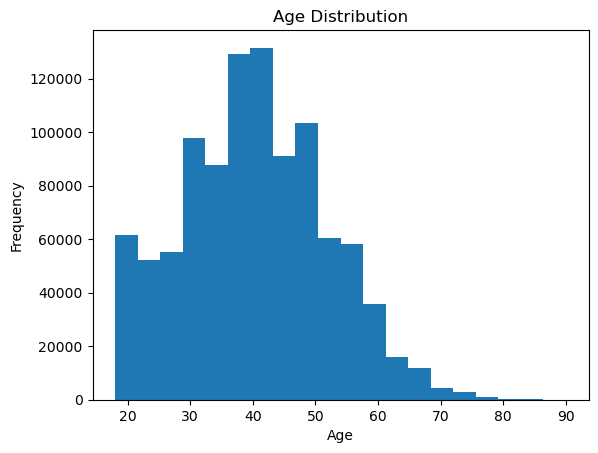

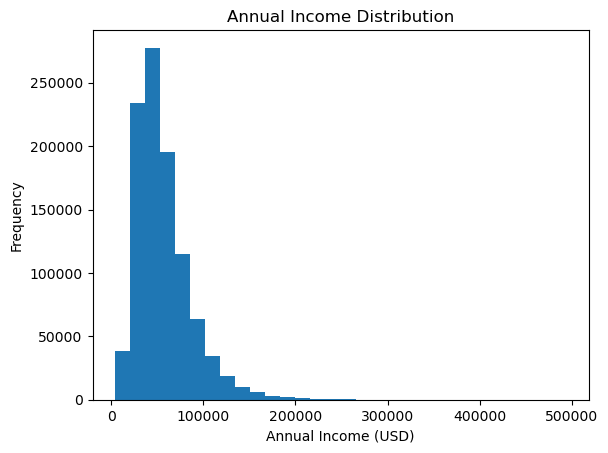

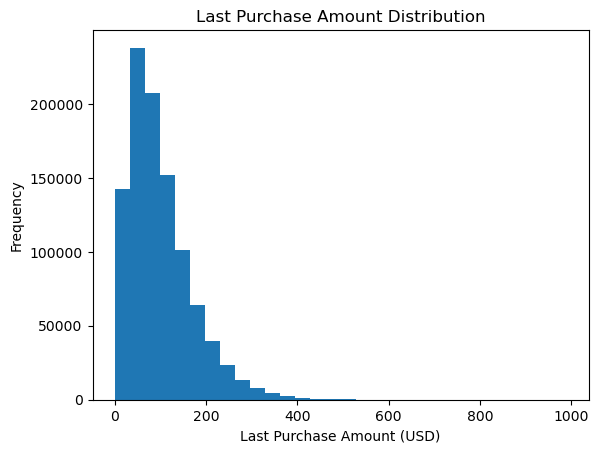

In [27]:
from faker import Faker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ── Setup & Data Generation ─────────────────────────────────────────────────────
faker = Faker()

n = 1_000_000

# Numeric distributions
ages = np.clip(np.random.normal(loc=40, scale=12, size=n).round().astype(int), 18, 90)
incomes = np.random.lognormal(mean=np.log(50_000), sigma=0.5, size=n)
purchases = np.random.gamma(shape=2, scale=50, size=n)

# Build DataFrame
df = pd.DataFrame({
    'age': ages,
    'annual_income_usd': incomes,
    'last_purchase_usd': purchases
})

# ── Plotting Distributions ───────────────────────────────────────────────────────
# 1. Age Distribution
plt.figure()
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Annual Income Distribution
plt.figure()
plt.hist(df['annual_income_usd'], bins=30)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()

# 3. Last Purchase Amount Distribution
plt.figure()
plt.hist(df['last_purchase_usd'], bins=30)
plt.title('Last Purchase Amount Distribution')
plt.xlabel('Last Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()


In [22]:
from faker import Faker
import numpy as np
import pandas as pd

# ── 1) Setup ────────────────────────────────────────────────────────────────────
faker = Faker()
Faker.seed(123)            # make Faker reproducible
np.random.seed(42)         # make NumPy reproducible
n = 1_000                  # number of base records

# ── 2) Generate Clean Base Data ────────────────────────────────────────────────
ages     = np.clip( np.random.normal(loc=40, scale=12, size=n).astype(int), 18, 90 )
incomes  = np.random.lognormal(mean=np.log(50_000), sigma=0.5, size=n)
purchases= np.random.gamma(shape=2, scale=50, size=n)

df = pd.DataFrame({
    'age':     ages,
    'income':  incomes,
    'purchase':purchases
})

# ── 3) Inject Outliers & Anomalies ──────────────────────────────────────────────

# a) Extreme high‑income outliers (1% of rows ×10)
idx_high = np.random.choice(df.index, size=int(0.01 * n), replace=False)
df.loc[idx_high, 'income'] *= 10

# b) Negative purchase amounts (1% of rows)
idx_neg   = np.random.choice(df.index, size=int(0.01 * n), replace=False)
df.loc[idx_neg, 'purchase'] *= -1

# c) Impossible ages (1% of rows set to 5 or 150)
idx_age   = np.random.choice(df.index, size=int(0.01 * n), replace=False)
df.loc[idx_age, 'age'] = np.random.choice([5, 150], size=int(0.01 * n))

# d) Missing incomes (1% of rows)
idx_nan   = np.random.choice(df.index, size=int(0.01 * n), replace=False)
df.loc[idx_nan, 'income'] = np.nan

# e) Duplicate rows (add an extra 1% sample)
df = pd.concat([df, df.sample(frac=0.01, random_state=42)], ignore_index=True)


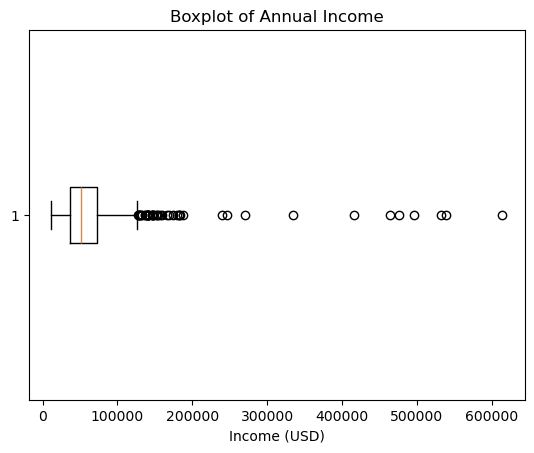

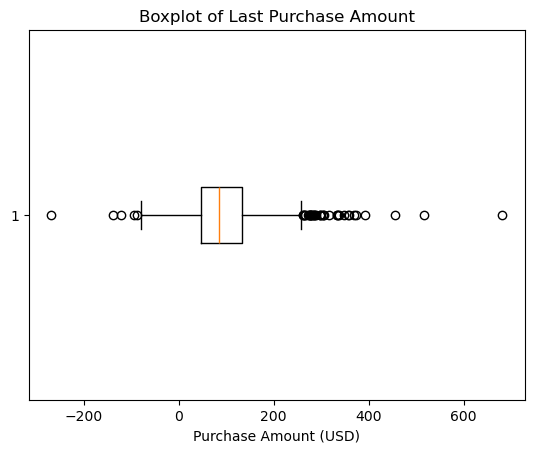

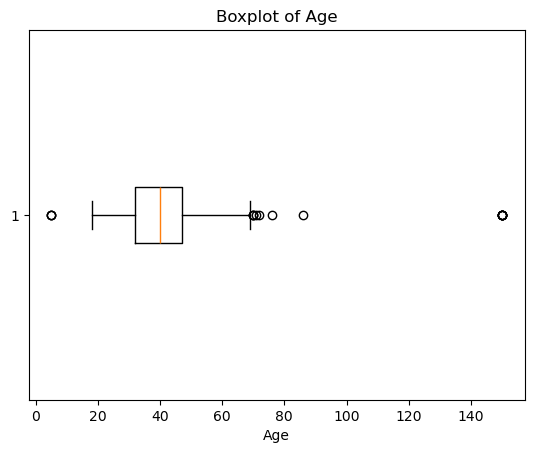

In [23]:
from faker import Faker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ── 1) Setup & Base Data ─────────────────────────────────────────────────────
faker = Faker()
Faker.seed(123)
np.random.seed(42)
n = 1_000

ages = np.clip(np.random.normal(loc=40, scale=12, size=n).astype(int), 18, 90)
incomes = np.random.lognormal(mean=np.log(50_000), sigma=0.5, size=n)
purchases = np.random.gamma(shape=2, scale=50, size=n)

df = pd.DataFrame({
    'age': ages,
    'income': incomes,
    'purchase': purchases
})

# ── 2) Inject Outliers & Anomalies ─────────────────────────────────────────────
idx_high = np.random.choice(df.index, size=int(0.01 * n), replace=False)
df.loc[idx_high, 'income'] *= 10

idx_neg = np.random.choice(df.index, size=int(0.01 * n), replace=False)
df.loc[idx_neg, 'purchase'] *= -1

idx_age = np.random.choice(df.index, size=int(0.01 * n), replace=False)
df.loc[idx_age, 'age'] = np.random.choice([5, 150], size=int(0.01 * n))

idx_nan = np.random.choice(df.index, size=int(0.01 * n), replace=False)
df.loc[idx_nan, 'income'] = np.nan

df = pd.concat([df, df.sample(frac=0.01, random_state=42)], ignore_index=True)

# ── 3) Plot Boxplots to Highlight Outliers ─────────────────────────────────────
# Income boxplot
plt.figure()
plt.boxplot(df['income'].dropna(), vert=False)
plt.title('Boxplot of Annual Income')
plt.xlabel('Income (USD)')
plt.show()

# Purchase amount boxplot
plt.figure()
plt.boxplot(df['purchase'], vert=False)
plt.title('Boxplot of Last Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.show()

# Age boxplot
plt.figure()
plt.boxplot(df['age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


In [29]:
np.array([1,2])

array([1, 2])